# Lab: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

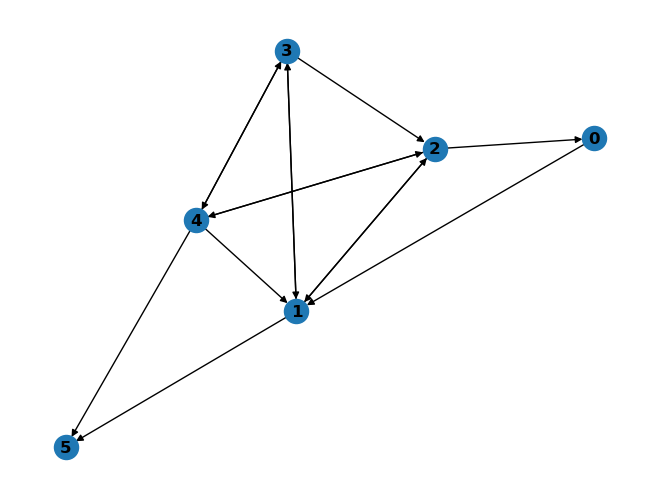

#nodes: 6, #edges: 14
node-0, #in_degrees 1, #out_degrees 1
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 2, #out_degrees 4
node-5, #in_degrees 2, #out_degrees 0
[[0 1 0 0 0 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 0 0]]


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 0],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [0, 0, 0, 0, 0, 0]])

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [77]:
# your code to get the transition matrix M
M = Adj / Adj.sum(axis=1)
M = np.nan_to_num(M, nan=1/6)
M = M.T
print(M)

[[0.         0.         0.33333333 0.         0.         0.16666667]
 [1.         0.         0.33333333 0.33333333 0.25       0.16666667]
 [0.         0.33333333 0.         0.33333333 0.25       0.16666667]
 [0.         0.33333333 0.         0.         0.25       0.16666667]
 [0.         0.         0.33333333 0.33333333 0.         0.16666667]
 [0.         0.33333333 0.         0.         0.25       0.16666667]]


C:\Users\rickw\AppData\Local\Temp\ipykernel_2860\4234580811.py:2: RuntimeWarning: invalid value encountered in true_divide
  M = Adj / Adj.sum(axis=1)


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [78]:
# your code
epsilon = .01 # set the stopping criterion
r = np.full((G.number_of_nodes(),1), 1/G.number_of_nodes()) # initialize r with equal importance scores

while True:
    r_new = np.dot(M, r) # compute the new importance scores
    if np.linalg.norm(r_new - r, ord=1) < epsilon: # check the stopping criterion
        break
    r = r_new # update r with the new importance scores

r = r.flatten() # flatten r to get a 1D array
print(r)

[[0.09209114 0.26916509 0.19893297 0.14878669 0.14223742 0.14878669]]
